In [1]:
import sys
sys.path.insert(0, "../src")
from IPython.core import display as ICD

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
directory = "../processed_dataset"
dfs = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"): 
        data = pd.read_json(os.path.join(directory, filename)) # read data frame from json file
        dfs.append(data) # append the data frame to the list
    else:
        continue


dataset = pd.concat(dfs, ignore_index=True)
dataset.head()

,k,n,b,r,q,p,K,N,B,R,Q,P,winner
0,1,1,3,3,0,10,1,2,1,3,1,7,0.0
1,1,2,1,3,1,7,1,0,0,5,1,8,1.0
2,1,1,1,3,1,10,1,3,2,1,1,9,0.0
3,1,2,3,1,1,9,1,2,3,1,1,9,0.0
4,1,2,3,0,2,6,1,1,1,2,2,7,1.0


In [4]:
dataset = dataset[dataset["P"] <= 8]
dataset = dataset[dataset["p"] <= 8]
dataset

,k,n,b,r,q,p,K,N,B,R,Q,P,winner
1,1,2,1,3,1,7,1,0,0,5,1,8,1.0
4,1,2,3,0,2,6,1,1,1,2,2,7,1.0
7,1,2,0,2,2,7,1,1,2,1,2,8,0.0
10,1,3,2,3,0,8,1,0,2,0,3,8,0.0
13,1,2,2,2,1,8,1,3,0,1,2,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391986,1,1,1,2,2,7,1,1,3,2,1,8,-1.0
1391992,1,1,2,3,1,7,1,0,2,2,2,7,1.0
1391994,1,1,1,2,2,7,1,1,3,2,1,8,-1.0
1391997,1,3,0,1,2,8,1,0,0,2,3,6,1.0


In [5]:
draws = dataset[dataset["winner"] == 0]["winner"].count()
draws

100411

In [6]:
white_wins = dataset[dataset["winner"] == 1]["winner"].count()
white_wins

192681

In [7]:
black_wins = dataset[dataset["winner"] == -1]["winner"].count()
black_wins

153269

In [8]:
total_games = draws + white_wins + black_wins
total_games

446361

In [9]:
"W/B/D: {:.2f}/{:.2f}/{:.2f}".format(float(white_wins/total_games),
                                     float(black_wins/total_games),
                                     float(draws/total_games))

'W/B/D: 0.43/0.34/0.22'

<AxesSubplot:ylabel='winner'>

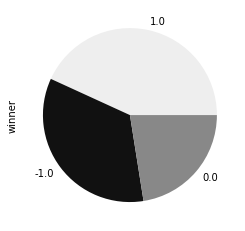

In [10]:
dataset["winner"].value_counts().plot.pie(colors=["#EEE", "#111", "#888"])

In [11]:
dataset['white_comb'] = dataset[dataset.columns[6:12]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
dataset['black_comb'] = dataset[dataset.columns[0:6]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [12]:
dataset

,k,n,b,r,q,p,K,N,B,R,Q,P,winner,white_comb,black_comb
1,1,2,1,3,1,7,1,0,0,5,1,8,1.0,"1,0,0,5,1,8","1,2,1,3,1,7"
4,1,2,3,0,2,6,1,1,1,2,2,7,1.0,"1,1,1,2,2,7","1,2,3,0,2,6"
7,1,2,0,2,2,7,1,1,2,1,2,8,0.0,"1,1,2,1,2,8","1,2,0,2,2,7"
10,1,3,2,3,0,8,1,0,2,0,3,8,0.0,"1,0,2,0,3,8","1,3,2,3,0,8"
13,1,2,2,2,1,8,1,3,0,1,2,8,1.0,"1,3,0,1,2,8","1,2,2,2,1,8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391986,1,1,1,2,2,7,1,1,3,2,1,8,-1.0,"1,1,3,2,1,8","1,1,1,2,2,7"
1391992,1,1,2,3,1,7,1,0,2,2,2,7,1.0,"1,0,2,2,2,7","1,1,2,3,1,7"
1391994,1,1,1,2,2,7,1,1,3,2,1,8,-1.0,"1,1,3,2,1,8","1,1,1,2,2,7"
1391997,1,3,0,1,2,8,1,0,0,2,3,6,1.0,"1,0,0,2,3,6","1,3,0,1,2,8"


In [13]:
dataset = dataset[dataset.columns[12:]]

In [14]:
dataset

,winner,white_comb,black_comb
1,1.0,"1,0,0,5,1,8","1,2,1,3,1,7"
4,1.0,"1,1,1,2,2,7","1,2,3,0,2,6"
7,0.0,"1,1,2,1,2,8","1,2,0,2,2,7"
10,0.0,"1,0,2,0,3,8","1,3,2,3,0,8"
13,1.0,"1,3,0,1,2,8","1,2,2,2,1,8"
...,...,...,...
1391986,-1.0,"1,1,3,2,1,8","1,1,1,2,2,7"
1391992,1.0,"1,0,2,2,2,7","1,1,2,3,1,7"
1391994,-1.0,"1,1,3,2,1,8","1,1,1,2,2,7"
1391997,1.0,"1,0,0,2,3,6","1,3,0,1,2,8"


In [15]:
dataset_no_duplicates = dataset.groupby(dataset.columns.tolist(),as_index=False).size()
dataset_no_duplicates

,winner,white_comb,black_comb,size
0,-1.0,"1,0,0,0,4,7","1,0,0,0,4,7",9
1,-1.0,"1,0,0,0,4,7","1,0,0,2,3,6",7
2,-1.0,"1,0,0,0,4,7","1,0,0,5,1,8",2
3,-1.0,"1,0,0,0,4,7","1,0,1,1,3,7",27
4,-1.0,"1,0,0,0,4,7","1,0,1,3,2,6",7
...,...,...,...,...
12102,1.0,"1,7,0,2,0,6","1,1,1,2,2,7",1
12103,1.0,"1,7,0,2,0,6","1,1,2,1,2,8",1
12104,1.0,"1,7,0,2,0,6","1,1,2,3,1,7",2
12105,1.0,"1,7,0,2,0,6","1,2,1,1,2,8",3


In [16]:
df_combs = dataset_no_duplicates.pivot_table(index=['white_comb', 'black_comb'], 
            columns=['winner'], values='size').fillna(0).reset_index()
df_combs.columns = ['white_comb', 'black_comb', 'black_win', 'draw', 'white_win']
df_combs

,white_comb,black_comb,black_win,draw,white_win
0,"1,0,0,0,4,7","1,0,0,0,4,7",9.0,4.0,5.0
1,"1,0,0,0,4,7","1,0,0,2,3,6",7.0,1.0,6.0
2,"1,0,0,0,4,7","1,0,0,5,1,8",2.0,0.0,1.0
3,"1,0,0,0,4,7","1,0,1,1,3,7",27.0,12.0,34.0
4,"1,0,0,0,4,7","1,0,1,3,2,6",7.0,4.0,13.0
...,...,...,...,...,...
6238,"1,8,1,0,0,8","1,3,0,1,2,8",0.0,1.0,0.0
6239,"1,8,1,0,0,8","1,3,1,2,1,8",0.0,2.0,0.0
6240,"1,8,1,0,0,8","1,7,1,1,0,7",0.0,1.0,0.0
6241,"1,9,0,0,0,8","1,2,5,2,0,6",0.0,1.0,0.0


In [17]:
df_combs["total"] = df_combs["black_win"] + df_combs["white_win"] + df_combs["draw"]
df_combs

,white_comb,black_comb,black_win,draw,white_win,total
0,"1,0,0,0,4,7","1,0,0,0,4,7",9.0,4.0,5.0,18.0
1,"1,0,0,0,4,7","1,0,0,2,3,6",7.0,1.0,6.0,14.0
2,"1,0,0,0,4,7","1,0,0,5,1,8",2.0,0.0,1.0,3.0
3,"1,0,0,0,4,7","1,0,1,1,3,7",27.0,12.0,34.0,73.0
4,"1,0,0,0,4,7","1,0,1,3,2,6",7.0,4.0,13.0,24.0
...,...,...,...,...,...,...
6238,"1,8,1,0,0,8","1,3,0,1,2,8",0.0,1.0,0.0,1.0
6239,"1,8,1,0,0,8","1,3,1,2,1,8",0.0,2.0,0.0,2.0
6240,"1,8,1,0,0,8","1,7,1,1,0,7",0.0,1.0,0.0,1.0
6241,"1,9,0,0,0,8","1,2,5,2,0,6",0.0,1.0,0.0,1.0


In [18]:
df_combs["white_perc"] = df_combs["white_win"]/df_combs["total"]
df_combs["black_perc"] = df_combs["black_win"]/df_combs["total"]
df_combs["draw_perc"] = df_combs["draw"]/df_combs["total"]
df_combs = df_combs.sort_values(["total"], ascending=False)
df_combs = df_combs[df_combs["total"]>=30]
df_combs

,white_comb,black_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
2907,"1,2,1,1,2,8","1,1,2,1,2,8",1362.0,449.0,1496.0,3307.0,0.452374,0.411854,0.135773
1856,"1,1,2,1,2,8","1,1,2,1,2,8",1264.0,416.0,1508.0,3188.0,0.473024,0.396487,0.130489
1871,"1,1,2,1,2,8","1,2,1,1,2,8",1126.0,423.0,1604.0,3153.0,0.508722,0.357120,0.134158
2922,"1,2,1,1,2,8","1,2,1,1,2,8",1151.0,440.0,1516.0,3107.0,0.487930,0.370454,0.141616
3163,"1,2,2,2,1,8","1,2,1,1,2,8",1470.0,290.0,1103.0,2863.0,0.385260,0.513447,0.101292
...,...,...,...,...,...,...,...,...,...
5121,"1,4,3,0,1,7","1,2,3,3,0,8",0.0,30.0,0.0,30.0,0.000000,0.000000,1.000000
4754,"1,4,0,2,1,8","1,4,1,3,0,8",0.0,30.0,0.0,30.0,0.000000,0.000000,1.000000
3525,"1,2,4,1,1,6","1,4,1,3,0,8",0.0,30.0,0.0,30.0,0.000000,0.000000,1.000000
1667,"1,1,1,2,2,7","1,0,4,4,0,7",14.0,2.0,14.0,30.0,0.466667,0.466667,0.066667


In [19]:
white_comb_df = dataset.groupby(["white_comb", "winner"],as_index=False).size()
white_comb_df = white_comb_df.pivot_table(index=['white_comb'], 
            columns=['winner'], values='size').fillna(0).reset_index()
white_comb_df.columns = ["white_comb", "black_win", "draw", "white_win"]
white_comb_df

,white_comb,black_win,draw,white_win
0,"1,0,0,0,4,7",802.0,448.0,1291.0
1,"1,0,0,2,3,6",779.0,601.0,1824.0
2,"1,0,0,5,1,8",498.0,204.0,480.0
3,"1,0,0,7,0,7",17.0,3.0,16.0
4,"1,0,1,1,3,7",3382.0,2412.0,7252.0
...,...,...,...,...
90,"1,7,1,1,0,7",0.0,134.0,0.0
91,"1,7,2,0,0,8",0.0,120.0,0.0
92,"1,8,0,1,0,7",0.0,19.0,0.0
93,"1,8,1,0,0,8",0.0,23.0,0.0


In [20]:
black_comb_df = dataset.groupby(["black_comb", "winner"],as_index=False).size()
black_comb_df = black_comb_df.pivot_table(index=['black_comb'], 
            columns=['winner'], values='size').fillna(0).reset_index()
black_comb_df.columns = ["black_comb", "black_win", "draw", "white_win"]
black_comb_df

,black_comb,black_win,draw,white_win
0,"1,0,0,0,4,7",941.0,443.0,1096.0
1,"1,0,0,2,3,6",1541.0,608.0,1125.0
2,"1,0,0,5,1,8",435.0,227.0,620.0
3,"1,0,0,7,0,7",7.0,8.0,21.0
4,"1,0,1,1,3,7",6058.0,2303.0,4703.0
...,...,...,...,...
89,"1,7,0,2,0,6",8.0,3.0,19.0
90,"1,7,1,1,0,7",0.0,129.0,0.0
91,"1,7,2,0,0,8",0.0,110.0,0.0
92,"1,8,0,1,0,7",0.0,23.0,0.0
